In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [131]:
df = pd.read_pickle('../../datasets/processed/movies.pkl')
df.head()

,title,rating,year,month,certificate,runtime,directors,stars,genre,filming_location,budget,income_$,country_of_origin
0,Avatar: The Way of Water,8.0,2022,December,PG-13,192,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...","Action, Adventure, Fantasy",New Zealand,$350000000,681081686,United States
1,Guillermo del Toro's Pinocchio,7.8,2022,December,PG,117,"Guillermo del Toro, Mark Gustafson","Ewan McGregor, David Bradley, Gregory Mann, Bu...","Animation, Drama, Family",USA,$35000000,71614,"United States, Mexico, France"
2,Bullet Train,7.3,2022,August,R,127,David Leitch,"Brad Pitt, Joey King, Aaron Taylor Johnson, Br...","Action, Comedy, Thriller",Japan,$85900000,239268602,"Japan, United States"
3,The Banshees of Inisherin,8.0,2022,November,R,114,Martin McDonagh,"Colin Farrell, Brendan Gleeson, Kerry Condon, ...","Comedy, Drama",Ireland,Unknown,19720823,"Ireland, United Kingdom, United States"
4,M3gan,6.7,2022,January,PG-13,102,Gerard Johnstone,"Jenna Davis, Amie Donald, Allison Williams, Vi...","Horror, Sci-Fi, Thriller",New Zealand,Unknown,90776006,United States


In [168]:
# Selecionar as colunas Rating e Title
df_ratings = df[['rating', 'title']]

# Obter os 10 filmes com as maiores notas
top_ratings = df_ratings.nlargest(10, 'rating')

# Exibir os resultados
print(top_ratings)

      rating                                          title
1249     9.6                             My Little Princess
1193     9.0                      67th Street, New York, NY
1401     9.0                                The Dark Knight
1903     9.0  The Lord of the Rings: The Return of the King
1200     8.8                                      Inception
800      8.6                                   Interstellar
45       8.5                                        Kantara
308      8.5                                       Parasite
803      8.5                                       Whiplash
1604     8.5                                   The Departed


In [132]:
df = df[df['budget'].str.startswith('$')]

# Converta os valores em dólares ($) para inteiros
df['budget'] = df['budget'].str.replace(',', '').str.replace('$', '').astype(int)



C:\Users\satofants\AppData\Local\Temp\ipykernel_23684\2715347694.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['budget'] = df['budget'].str.replace(',', '').str.replace('$', '').astype(int)


In [133]:
# converta para milhao de dólares
df['budget'] = df['budget'] / 1000000
df['income_$'] = df['income_$'] / 1000000


In [134]:
df['budget'].describe()

count    1619.000000
mean       63.566533
std        60.960315
min         0.000010
25%        19.900000
50%        40.000000
75%        90.000000
max       356.000000
Name: budget, dtype: float64

In [169]:
df.sort_values('budget', ascending=False).head(10)

,title,rating,year,month,certificate,runtime,directors,stars,genre,filming_location,budget,income_$,country_of_origin,budget_range,runtime_group
305,Avengers: Endgame,8.4,2019,April,PG-13,181,"Anthony Russo, Joe Russo","Robert Downey Jr , Chris Evans, Mark Ruffalo, ...","Action, Adventure, Drama",UK,356.0,2797.501328,United States,250+,180-200
0,Avatar: The Way of Water,8.0,2022,December,PG-13,192,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...","Action, Adventure, Fantasy",New Zealand,350.0,681.081686,United States,250+,180-200
405,Avengers: Infinity War,8.4,2018,April,PG-13,149,"Anthony Russo, Joe Russo","Robert Downey Jr , Chris Hemsworth, Mark Ruffa...","Action, Adventure, Sci-Fi",UK,321.0,2048.359754,United States,250+,120-150
521,Star Wars: Episode VIII - The Last Jedi,6.9,2017,December,PG-13,152,Rian Johnson,"Daisy Ridley, John Boyega, Mark Hamill, Carrie...","Action, Adventure, Fantasy",Bolivia,317.0,1332.698830,United States,250+,150-180
123,Zack Snyder's Justice League,8.0,2021,March,R,242,Zack Snyder,"Henry Cavill, Ben Affleck, Gal Gadot, Amy Adams","Action, Adventure, Fantasy",Iceland,300.0,90.776006,United States,250+,>200
1539,Pirates of the Caribbean: At World's End,7.1,2007,May,PG-13,169,Gore Verbinski,"Johnny Depp, Orlando Bloom, Keira Knightley, G...","Action, Adventure, Fantasy",USA,300.0,960.996492,United States,250+,150-180
535,Justice League,6.1,2017,November,PG-13,120,Zack Snyder,"Ben Affleck, Gal Gadot, Jason Momoa, Ezra Miller","Action, Adventure, Fantasy",Iceland,300.0,657.926987,"United States, Canada, United Kingdom",250+,90-120
316,Star Wars: The Rise Of Skywalker,6.5,2019,December,PG-13,141,J J Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Adam D...","Action, Adventure, Fantasy",Jordan,275.0,1074.149279,United States,250+,120-150
420,Solo: A Star Wars Story,6.9,2018,May,PG-13,135,Ron Howard,"Alden Ehrenreich, Woody Harrelson, Emilia Clar...","Action, Adventure, Sci-Fi",Spain,275.0,392.924807,United States,250+,120-150
1627,Superman Returns,6.1,2006,June,PG-13,154,Bryan Singer,"Brandon Routh, Kevin Spacey, Kate Bosworth, Ja...","Action, Adventure, Sci-Fi",Australia,270.0,391.081192,"United States, Australia",250+,150-180


In [135]:
df.sort_values('budget', ascending=False).head(10)

,title,rating,year,month,certificate,runtime,directors,stars,genre,filming_location,budget,income_$,country_of_origin
305,Avengers: Endgame,8.4,2019,April,PG-13,181,"Anthony Russo, Joe Russo","Robert Downey Jr , Chris Evans, Mark Ruffalo, ...","Action, Adventure, Drama",UK,356.0,2797.501328,United States
0,Avatar: The Way of Water,8.0,2022,December,PG-13,192,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...","Action, Adventure, Fantasy",New Zealand,350.0,681.081686,United States
405,Avengers: Infinity War,8.4,2018,April,PG-13,149,"Anthony Russo, Joe Russo","Robert Downey Jr , Chris Hemsworth, Mark Ruffa...","Action, Adventure, Sci-Fi",UK,321.0,2048.359754,United States
521,Star Wars: Episode VIII - The Last Jedi,6.9,2017,December,PG-13,152,Rian Johnson,"Daisy Ridley, John Boyega, Mark Hamill, Carrie...","Action, Adventure, Fantasy",Bolivia,317.0,1332.698830,United States
123,Zack Snyder's Justice League,8.0,2021,March,R,242,Zack Snyder,"Henry Cavill, Ben Affleck, Gal Gadot, Amy Adams","Action, Adventure, Fantasy",Iceland,300.0,90.776006,United States
1539,Pirates of the Caribbean: At World's End,7.1,2007,May,PG-13,169,Gore Verbinski,"Johnny Depp, Orlando Bloom, Keira Knightley, G...","Action, Adventure, Fantasy",USA,300.0,960.996492,United States
535,Justice League,6.1,2017,November,PG-13,120,Zack Snyder,"Ben Affleck, Gal Gadot, Jason Momoa, Ezra Miller","Action, Adventure, Fantasy",Iceland,300.0,657.926987,"United States, Canada, United Kingdom"
316,Star Wars: The Rise Of Skywalker,6.5,2019,December,PG-13,141,J J Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Adam D...","Action, Adventure, Fantasy",Jordan,275.0,1074.149279,United States
420,Solo: A Star Wars Story,6.9,2018,May,PG-13,135,Ron Howard,"Alden Ehrenreich, Woody Harrelson, Emilia Clar...","Action, Adventure, Sci-Fi",Spain,275.0,392.924807,United States
1627,Superman Returns,6.1,2006,June,PG-13,154,Bryan Singer,"Brandon Routh, Kevin Spacey, Kate Bosworth, Ja...","Action, Adventure, Sci-Fi",Australia,270.0,391.081192,"United States, Australia"


In [136]:
df.sort_values('income_$', ascending=False).head(10)

,title,rating,year,month,certificate,runtime,directors,stars,genre,filming_location,budget,income_$,country_of_origin
1300,Avatar,7.8,2009,December,PG-13,162,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...","Action, Adventure, Fantasy",USA,237.0,2922.917914,United States
305,Avengers: Endgame,8.4,2019,April,PG-13,181,"Anthony Russo, Joe Russo","Robert Downey Jr , Chris Evans, Mark Ruffalo, ...","Action, Adventure, Drama",UK,356.0,2797.501328,United States
714,Star Wars: Episode VII - The Force Awakens,7.8,2015,December,PG-13,138,J J Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...","Action, Adventure, Sci-Fi",Ireland,245.0,2069.521700,United States
405,Avengers: Infinity War,8.4,2018,April,PG-13,149,"Anthony Russo, Joe Russo","Robert Downey Jr , Chris Hemsworth, Mark Ruffa...","Action, Adventure, Sci-Fi",UK,321.0,2048.359754,United States
103,Spider-Man: No Way Home,8.3,2021,December,PG-13,148,Jon Watts,"Tom Holland, Zendaya, Benedict Cumberbatch, Ja...","Action, Adventure, Fantasy",Iceland,200.0,1917.430023,United States
723,Jurassic World,6.9,2015,June,PG-13,124,Colin Trevorrow,"Chris Pratt, Bryce Dallas Howard, Ty Simpkins,...","Action, Adventure, Sci-Fi",USA,150.0,1671.537444,United States
344,The Lion King,6.8,2019,July,PG,118,Jon Favreau,"Donald Glover, Beyonc , Seth Rogen, Chiwetel E...","Animation, Adventure, Drama",South Africa,260.0,1663.250487,"United States, United Kingdom"
1008,The Avengers,8.0,2012,May,PG-13,143,Joss Whedon,"Robert Downey Jr , Chris Evans, Scarlett Johan...","Action, Adventure, Sci-Fi",USA,220.0,1518.815515,United States
753,Furious 7,7.1,2015,April,PG-13,137,James Wan,"Vin Diesel, Paul Walker, Dwayne Johnson, Jason...","Action, Crime, Thriller",United Arab Emirates,190.0,1515.341399,"United States, China, Japan, Canada, United Ar..."
27,Top Gun: Maverick,8.4,2022,May,PG-13,130,Joseph Kosinski,"Tom Cruise, Jennifer Connelly, Miles Teller, V...","Action, Drama",USA,170.0,1488.732821,United States


In [198]:
bins = [0.1, 5 ,10, 25, 50, 100, 150, 200, 250, float('inf')]
labels = ['0.1-5', '5-10','10-25', '25-50', '50-100', '100-150', '150-200', '200-250', '250+']
df['budget_range'] = pd.cut(df['budget'], bins=bins, labels=labels)

budget_counts = df['budget_range'].value_counts(normalize=True) * 100

print(budget_counts)


25-50      23.759305
50-100     21.588089
10-25      19.416873
100-150    10.545906
0.1-5       8.064516
150-200     7.630273
5-10        6.327543
200-250     1.861042
250+        0.806452
Name: budget_range, dtype: float64


In [191]:
contagem_filmes = df.pivot_table(index='runtime_group', values='income_$', aggfunc='mean')
contagem_filmes.reset_index()

,runtime_group,income_$
0,<90,124.872425
1,90-120,166.433903
2,120-150,295.352431
3,150-180,420.969076
4,180-200,812.182590
5,>200,412.734202


In [182]:
df.groupby(['budget_range'])['certificate'].value_counts()

budget_range  certificate
0.1-5         R              105
              PG-13           14
              Unrated          9
              PG               1
              TV-MA            1
              G                0
              NC-17            0
              TV-14            0
              TV-G             0
              TV-PG            0
              TV-Y7            0
5-10          R               67
              PG-13           21
              Unrated          6
              TV-MA            3
              PG               2
              NC-17            1
              TV-14            1
              TV-G             1
              G                0
              TV-PG            0
              TV-Y7            0
10-25         R              182
              PG-13           96
              PG              25
              Unrated          4
              NC-17            3
              G                2
              TV-MA            1
              TV-

In [183]:

df.groupby('budget_range')[
    [
        'month', 'certificate', 
        'directors', 'filming_location', 
        'year', 'country_of_origin'
    ]
].agg(lambda x: x.mode()[0])

,month,certificate,directors,filming_location,year,country_of_origin
budget_range,,,,,,
0.1-5,October,R,Eli Roth,USA,2014,United States
5-10,January,R,Ari Aster,USA,2019,United States
10-25,January,R,Wes Anderson,USA,2007,United States
25-50,November,R,Joe Wright,USA,2005,United States
50-100,December,PG-13,Antoine Fuqua,USA,2003,United States
100-150,November,PG-13,Shawn Levy,USA,2007,United States
150-200,May,PG-13,Bryan Singer,USA,2021,United States
200-250,May,PG-13,Peter Jackson,USA,2012,United States
250+,December,PG-13,"Anthony Russo, Joe Russo",Iceland,2019,United States


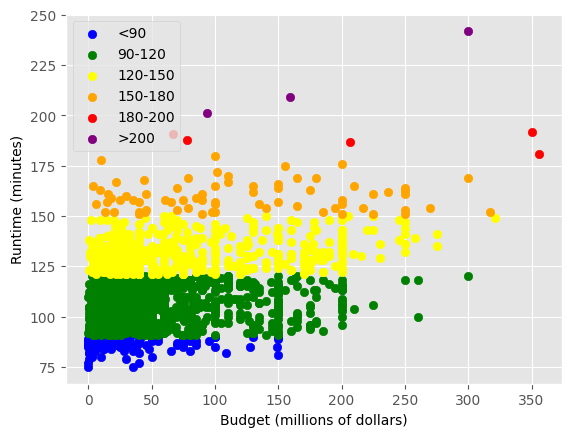

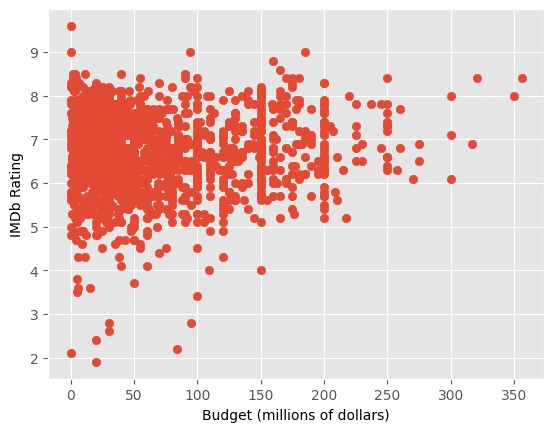

In [179]:
bins = [0, 90, 120, 150, 180, 200, float('inf')]
labels = ['<90', '90-120', '120-150', '150-180', '180-200', '>200']
df['runtime_group'] = pd.cut(df['runtime'], bins=bins, labels=labels)

# Plote um gráfico de dispersão com cada grupo de tempo de execução em uma cor diferente
colors = {'<90': 'blue', '90-120': 'green', '120-150': 'yellow', '150-180': 'orange', '180-200': 'red', '>200': 'purple'}
for runtime_group, color in colors.items():
    plt.scatter(df[df['runtime_group'] == runtime_group]['budget'], df[df['runtime_group'] == runtime_group]['runtime'], c=color, label=runtime_group)

plt.xlabel('Budget (millions of dollars)')
plt.ylabel('Runtime (minutes)')
plt.legend()
plt.show()



plt.scatter(df['budget'], df['rating'])
plt.xlabel('Budget (millions of dollars)')
plt.ylabel('IMDb Rating')
plt.show()


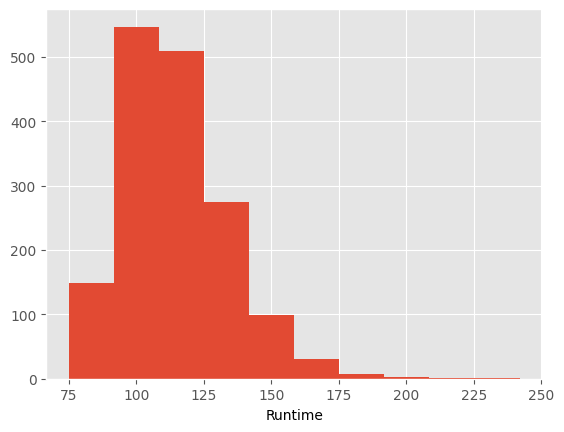

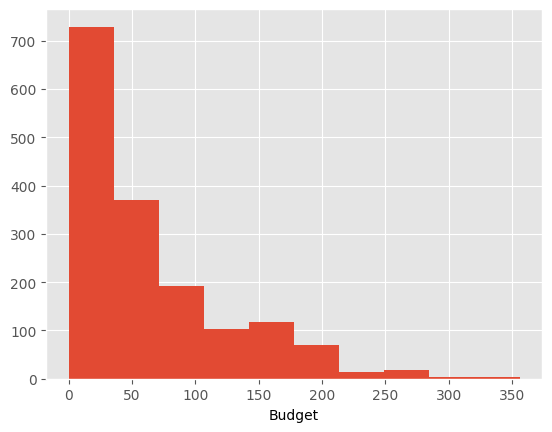

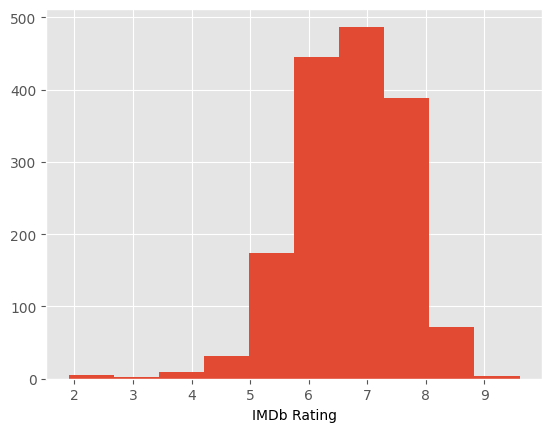

In [180]:
df['runtime'].hist()
plt.xlabel('Runtime')
plt.show()

df['budget'].hist()
plt.xlabel('Budget')
plt.show()

df['rating'].hist()
plt.xlabel('IMDb Rating')
plt.show()


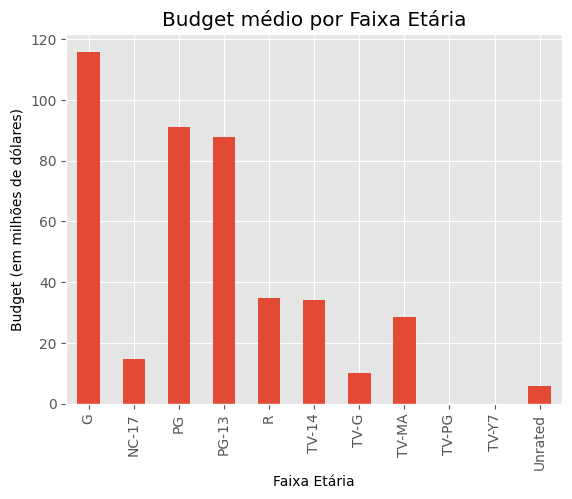

In [181]:
budget_by_cert = df.groupby(['certificate'])['budget'].mean()
plt.style.use('ggplot')
budget_by_cert.plot(kind='bar')
plt.xlabel('Faixa Etária')
plt.ylabel('Budget (em milhões de dólares)')
plt.title('Budget médio por Faixa Etária')
plt.show()